## Importiere `pandas`, `matplotlib`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import json
from datetime import datetime as dt
import locale
from scipy.interpolate import interp1d
from configparser import ConfigParser
from functions import *

## Lade die Konfigurationen aus `config.ini`
#### Definiere die Umgebung

In [2]:
config = ConfigParser()
files = config.read('config.ini')

# Wechsel des plt.style per config.ini machbar.
plt.style.use(config.get('theme', 'plt.style'))

# Damit Daten mit den deutschen Begriffen für die Monat generiert werden.
locale = locale.setlocale(locale.LC_TIME, "de_DE")

In [3]:
env = 'test'
database_file = config.get(env, 'database_file')
date_begin = config.get(env, 'date_begin')
date_end = config.get(env, 'date_end')
dpi = config.get(env, 'dpi')

In [4]:
df = pd.read_json(database_file)

#### Filter die Artikel nach: Sind zwischen dem und dem Datum veröffentlich worden.

In [5]:
df = df.loc[(df['date'] >= date_begin) & (df['date'] <= date_end)]

In [6]:
df['date'] = pd.to_datetime(df['date'], utc=True)

#### Ändere die Spalte `ressort` zu einem Anfangsgroßbuchstaben

In [7]:
df.ressort = df.ressort.str.title()

#### Zähle die Anzahl pro Ressort

In [8]:
df = df.ressort.value_counts().reset_index(name="amount")
df['color'] = "#8ecae6" # BLUE
df['edgecolor'] = "#219ebc" # BLUE

## Balkendiagramm

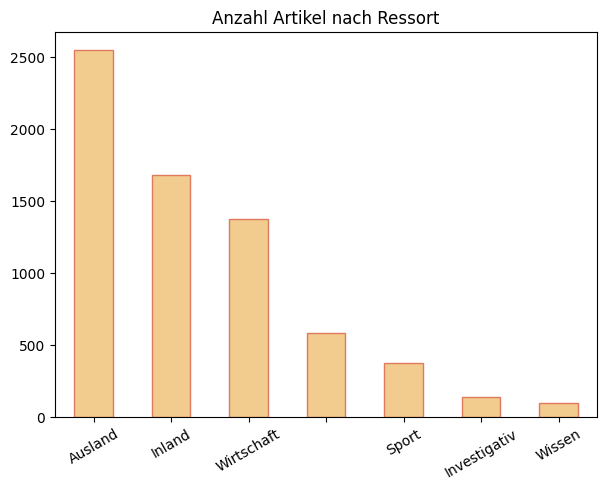

In [9]:
ax = df.plot(kind="bar", x="index", y="amount", figsize=(7,5), legend=False, rot=30, color="#f2cc8f", edgecolor='#e07a5f', title="Anzahl Artikel nach Ressort")
ax.axes.get_xaxis().get_label().set_visible(False)

ax.get_figure().savefig('figures/bar-ressorts.png', bbox_inches="tight", dpi=float(dpi))

#### Benenne das Feature `index` zu `ressort`

In [10]:
df['ressort'] = df['index']

#### Mache Abstufungen in den Farbintensitäten, indem Transparenzwerte angehangen werden

In [11]:
# transparent value from 100% - 10% * n; >34%
transparencies = ["FF", "E6", "CC",  "B3", "80",  "66", "4D"]
used = {"ressort": -1}

def highlight_color(row):
    used["ressort"] += 1
    row.color += transparencies[used['ressort']]
    return row
    
df = df.apply(highlight_color, axis=1)

## Kreisdiagramm

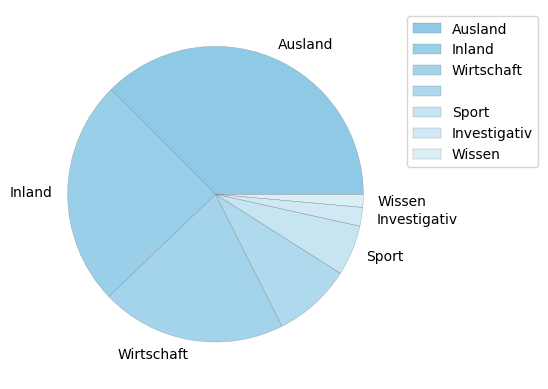

In [12]:
ax = df.plot(kind="pie", y="amount", labels=df.ressort, colors=df.color,  wedgeprops={"edgecolor": "grey", 'linewidth': 0.2, 'linestyle': 'solid', 'antialiased': True})

ax.axes.get_yaxis().get_label().set_visible(False)

ax.legend(labels=df.ressort, bbox_to_anchor=(1.0, 1.0))

ax.get_figure().savefig('figures/pie-ressort.png', bbox_inches="tight", dpi=float(dpi))